In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df=pd.read_csv('Mission Hospital.csv')

In [8]:
df.head()

,SL.,AGE,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,other- heart,other- respiratory,other-general,other-nervous,other-tertalogy,PM-VSD,RHD,BODY_WEIGHT,BODY_HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,Diabetes1,Diabetes2,hypertension1,hypertension2,hypertension3,other,HB,UREA,CREATININE,AMBULANCE,TRANSFERRED,ALERT,ELECTIVE,TOTAL_COST_TO_HOSPITAL,Ln(Total Cost),TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH OF STAY- WARD,IMPLANT,COST_OF_IMPLANT
0,1,58.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,49,160,118,100.0,80.0,32,0,0,0,0,0,0,11.0,33.0,0.8,1,0,1,0,660293.0,13.400439,474901,0,474901,25,12,13,1,38000
1,2,59.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,41,155,78,70.0,50.0,28,0,0,0,0,0,0,11.0,95.0,1.7,1,0,1,0,809130.0,13.603715,944819,96422,848397,41,20,21,1,39690
2,3,82.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,47,164,100,110.0,80.0,20,0,1,0,0,0,0,12.0,15.0,0.8,0,0,1,1,362231.0,12.800037,390000,30000,360000,18,9,9,0,0
3,4,46.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,80,173,122,110.0,80.0,24,0,0,1,0,0,0,12.0,74.0,1.5,1,0,1,0,629990.0,13.353459,324910,0,324910,14,13,1,1,89450
4,5,60.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,58,175,72,180.0,100.0,18,0,1,0,0,0,0,10.0,48.0,1.9,1,0,1,0,444876.0,13.005551,254673,10000,244673,24,12,12,0,0


In [10]:
df.isnull().any()

SL.                                   False
AGE                                   False
MALE                                  False
UNMARRIED                             False
ACHD                                  False
CAD-DVD                               False
CAD-SVD                               False
CAD-TVD                               False
CAD-VSD                               False
OS-ASD                                False
other- heart                          False
other- respiratory                    False
other-general                         False
other-nervous                         False
other-tertalogy                       False
PM-VSD                                False
RHD                                   False
BODY_WEIGHT                           False
BODY_HEIGHT                           False
HR PULSE                              False
BP -HIGH                               True
BP-LOW                                 True
RR                              

In [7]:
df=df.drop(['KEY COMPLAINTS -CODE','PAST MEDICAL HISTORY CODE','STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN', 'IMPLANT USED (Y/N)', 'MODE OF ARRIVAL', 'MARITAL STATUS', 'GENDER'], axis=1)

In [13]:
rev_null=['BP -HIGH','BP-LOW','UREA','CREATININE','HB']
df[rev_null]=df[rev_null].replace({np.nan:df['BP -HIGH'].mean(),
                                   np.nan:df['BP-LOW'].mean(),
                                   np.nan:df['UREA'].mean(),
                                   np.nan:df['CREATININE'].mean(),
                                   np.nan:df['HB'].mean()})

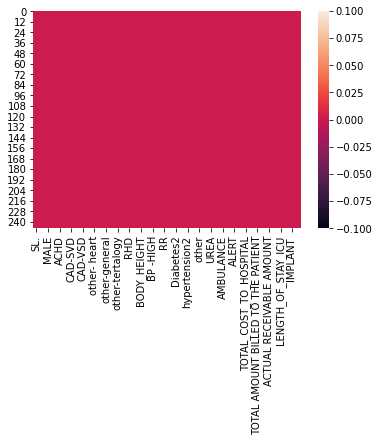

In [19]:
sns.heatmap(df.isnull())

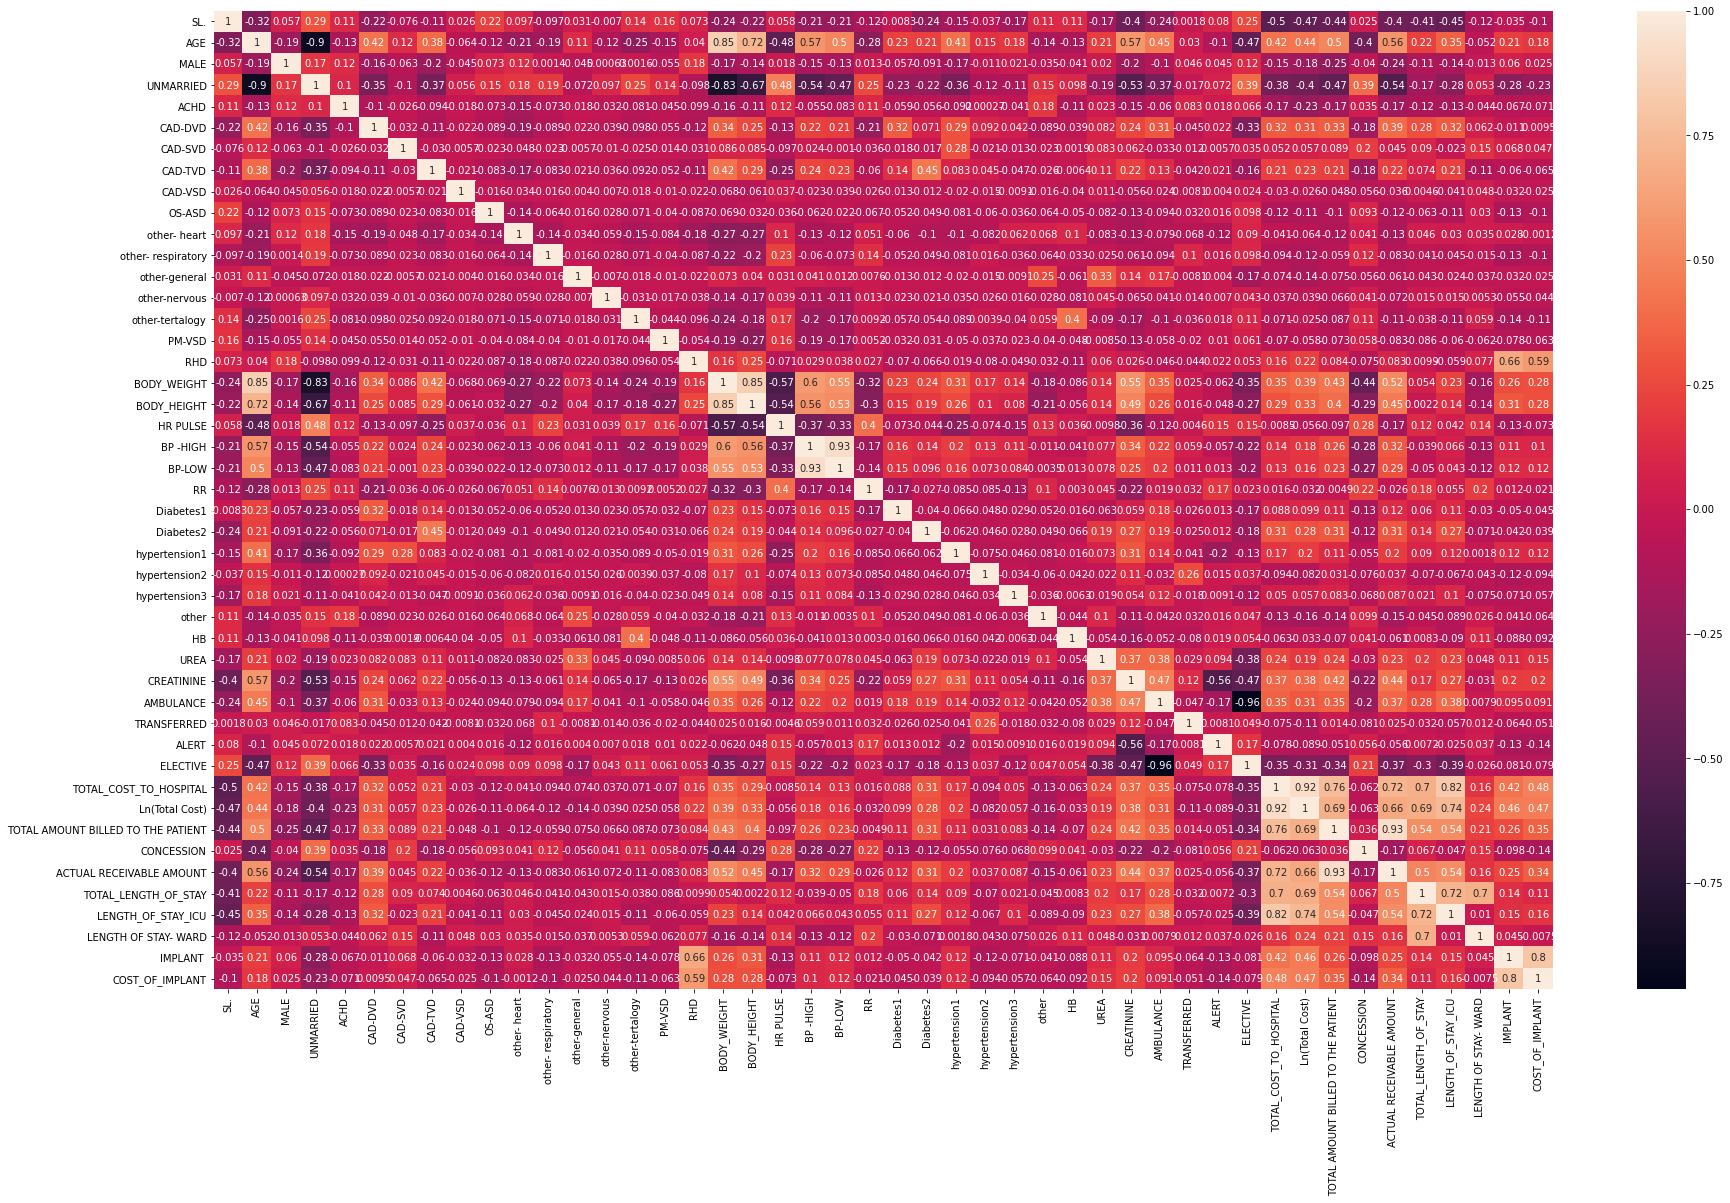

In [16]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(), annot=True)

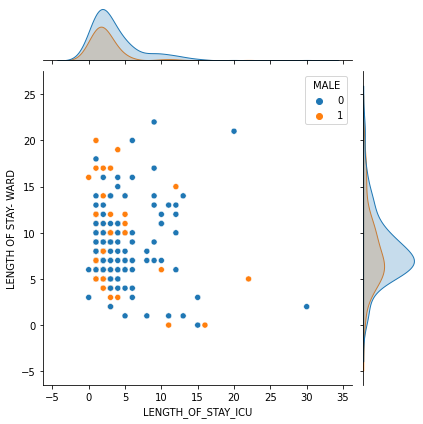

In [21]:
sns.jointplot(x='LENGTH_OF_STAY_ICU', y = 'LENGTH OF STAY- WARD' , hue='MALE',data=df)

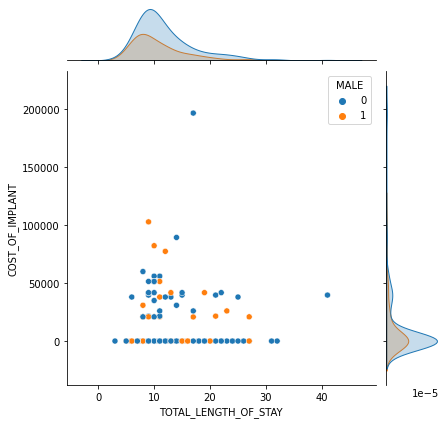

In [22]:
sns.jointplot(x='TOTAL_LENGTH_OF_STAY', y = 'COST_OF_IMPLANT' , hue='MALE',data=df)

In [23]:
#Features & Target
X = df.drop(['TOTAL AMOUNT BILLED TO THE PATIENT'], axis=1)
y=df['TOTAL AMOUNT BILLED TO THE PATIENT']
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Linear Regression
lm= LinearRegression()
#Model
lm.fit(X_train, y_train)
#Prediction
predictions = lm.predict(X_test)

In [24]:
#R^2 value can be find like this: it tell us how much variance our model explains so our model explain 93 percent of variance
metrics.explained_variance_score(y_test, predictions)

0.9318250971469026

In [25]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

22105.35076809288

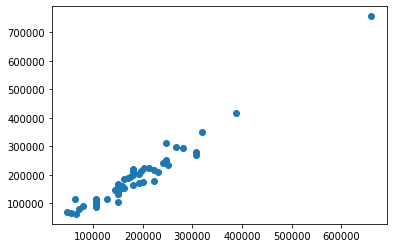

In [26]:
plt.scatter(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


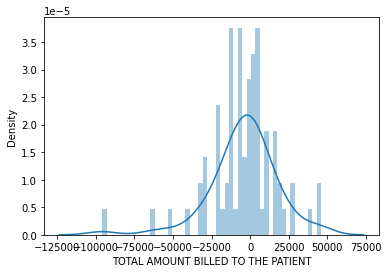

In [27]:
sns.distplot((y_test-predictions), bins = 50)

Feature: 0, Score: -70.09375
Feature: 1, Score: 654.27770
Feature: 2, Score: -5806.53194
Feature: 3, Score: 7210.79655
Feature: 4, Score: -2154.63482
Feature: 5, Score: -265.11635
Feature: 6, Score: 7104.95475
Feature: 7, Score: 16749.37387
Feature: 8, Score: -2462.91076
Feature: 9, Score: 6991.34232
Feature: 10, Score: 8074.08848
Feature: 11, Score: 6347.69221
Feature: 12, Score: -0.00000
Feature: 13, Score: 8426.76571
Feature: 14, Score: 10274.90595
Feature: 15, Score: 8591.55686
Feature: 16, Score: 10631.20338
Feature: 17, Score: 1.33815
Feature: 18, Score: -46.87233
Feature: 19, Score: 90.50397
Feature: 20, Score: 188.80040
Feature: 21, Score: -287.86452
Feature: 22, Score: -678.20280
Feature: 23, Score: 6716.17547
Feature: 24, Score: -1436.23117
Feature: 25, Score: -47766.77641
Feature: 26, Score: 4734.74672
Feature: 27, Score: -1935.01819
Feature: 28, Score: -172.78776
Feature: 29, Score: -471.30412
Feature: 30, Score: -44.86391
Feature: 31, Score: 9396.84074
Feature: 32, Score: 

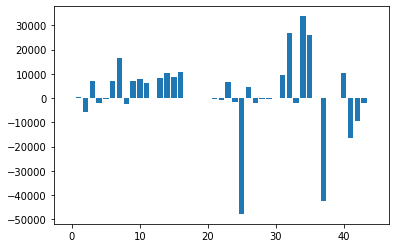

In [28]:
# get importance
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()